# Things that need to change

 - Might have to train with header separate from data. So numpy arrays with data, and a list of the headers separately. THis is because when using shap there is a problem with giving it a pandas dataframe with columns of mixed types. Because of the error, we are forced to pass it just a numpy array of the data, where it will complain that the classifier was trained on data with a header. The header list can be used in the visualizations to label the features.
 - Need to save data + models better. I spent like 1 hour + trying to get some shap stuff to work only to realise that the logistic regression and random forest classifiers were done differently (1 with a pipeline doing the scaling and then the model, the other with the scaling and model done not in a pipeline). This would not have been a problem as I noticed the one didn't do the pipeline, but then I didn't see that the data had been scaled earlier in the notebook! I suggest using pipeline for both, and saving the pipelines themselves so that they can be later loaded and the models extracted from the pipelines.

# Setup

In [1]:
# imports
import shap
import pickle
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from folktables import ACSDataSource
from sklearn.model_selection import train_test_split
from folktables.acs import adult_filter

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [3]:
# data saved like below in the past:
# X_train.to_csv('../data/X_train.csv', index=False)
# X_test.to_csv('../data/X_test.csv', index=False)
# pd.DataFrame(y_train, columns=['prediction']).to_csv('../data/y_train.csv', index=False)
# pd.DataFrame(y_test, columns=['prediction']).to_csv('../data/y_test.csv', index=False)

In [4]:
# loading data
X_train = pd.read_csv('../data/X_train.csv')
X_test = pd.read_csv('../data/X_test.csv')
y_train = pd.read_csv('../data/y_train.csv')
y_test = pd.read_csv('../data/y_test.csv')

# 3.1

### Using SHAP to explain predictions

For some of the plots we use just 1 row of data as an example of comparing how each model predicts on that singular row:

In [8]:
chosen_row = X_test.loc[[38489]]
print(y_test.loc[[38489]])

       prediction
38489       False


#### Logistic Regression

In [91]:
X_train

,AGEP,HINS1_2,HINS2_2,HINS4_2,CIT_2,CIT_3,CIT_4,CIT_5,COW_2.0,COW_3.0,...,RAC1P_4,RAC1P_5,RAC1P_6,RAC1P_7,RAC1P_8,RAC1P_9,ENG_2.0,ENG_3.0,ENG_4.0,ENG_nan
0,46,False,True,True,False,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,True
1,45,False,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,40,False,True,True,False,False,True,False,False,False,...,False,False,True,False,False,False,False,False,False,False
3,59,False,True,True,False,False,True,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,23,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156527,29,False,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
156528,42,False,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
156529,60,False,True,True,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True
156530,47,False,True,True,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True


In [102]:
# another alt
lr = 
con_var = ['AGEP']
cat_var = X_train.columns.tolist()[1:]

explainer = shap.LinearExplainer(lr)
shap.summary_plot(shap_values, test_shap, feature_names=all_features)

In [38]:
skwib = X_test.iloc[0:1000, :]

array([[62.,  0.,  1., ...,  0.,  0.,  1.],
       [33.,  0.,  1., ...,  0.,  0.,  1.],
       [33.,  0.,  0., ...,  0.,  0.,  1.],
       ...,
       [24.,  1.,  1., ...,  0.,  0.,  1.],
       [57.,  0.,  1., ...,  1.,  0.,  0.],
       [64.,  1.,  0., ...,  0.,  0.,  1.]])

In [53]:
X_test.iloc[0:1000, :].values

array([[62, False, True, ..., False, False, True],
       [33, False, True, ..., False, False, True],
       [33, False, False, ..., False, False, True],
       ...,
       [24, True, True, ..., False, False, True],
       [57, False, True, ..., True, False, False],
       [64, True, False, ..., False, False, True]], dtype=object)

In [82]:
# alt method? https://shap.readthedocs.io/en/latest/example_notebooks/tabular_examples/model_agnostic/Census%20income%20classification%20with%20scikit-learn.html
lr = pickle.load(open('../models/logistic_regression.pkl', 'rb'))

def lr_f(x):
    return lr.predict_proba(x)[:, 1]

med = X_train.median().values.reshape((1, X_train.shape[1]))

explainer = shap.Explainer(lr_f, med)
# below line no worky because dtype of pandas dataframe is object
# shap_values = explainer(X_test.iloc[0:1000, :])
shap_values = explainer(np.array(X_test.iloc[0:1000, :], dtype=float))

X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

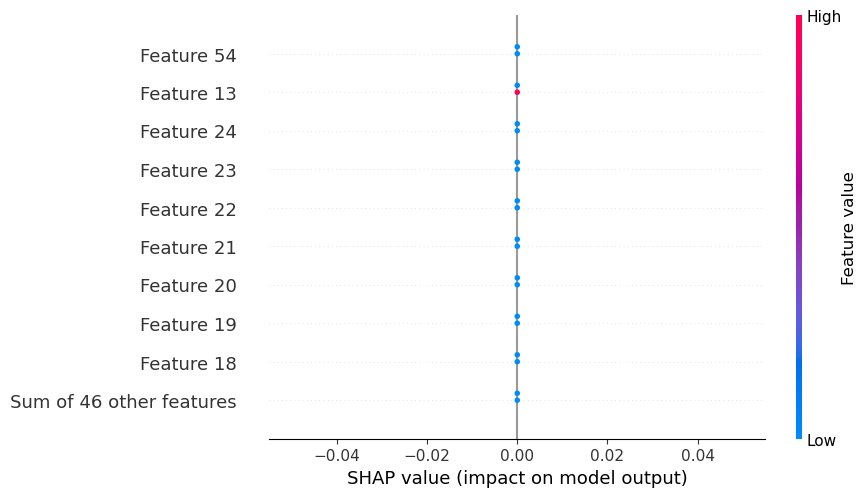

In [81]:
shap.plots.beeswarm(shap_values)

In [75]:
shap.plots.waterfall(shap_values[0])

ValueError: Image size of -640794694x594 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 800x650 with 3 Axes>

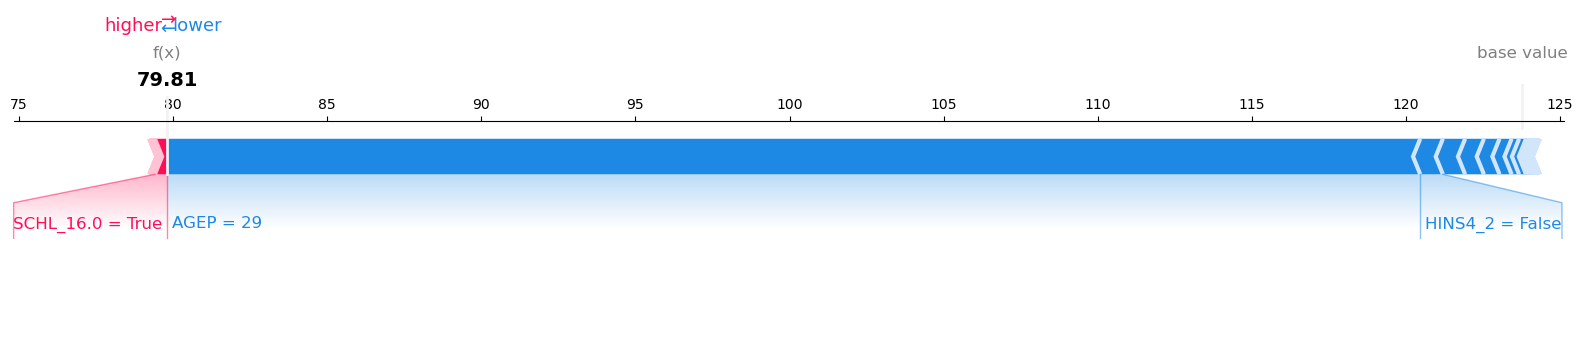

In [83]:
lr = pickle.load(open('../models/logistic_regression.pkl', 'rb'))
lr_explainer = shap.LinearExplainer(lr, X_train)

# Calculate SHAP values and force plot for the chosen singular row
shap_values = lr_explainer.shap_values(chosen_row)
shap.initjs()
shap.force_plot(lr_explainer.expected_value, shap_values, chosen_row, matplotlib=True)

TypeError: loop of ufunc does not support argument 0 of type float which has no callable rint method

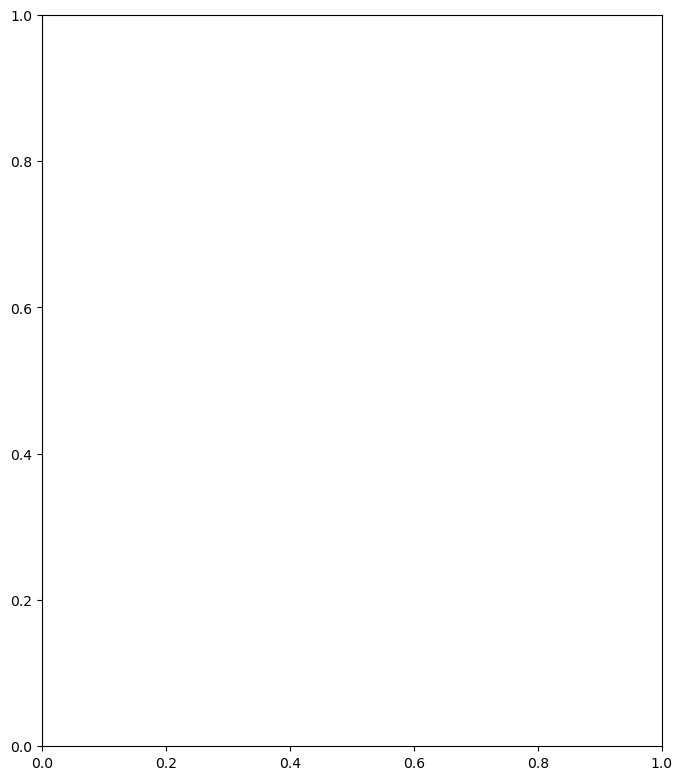

In [84]:
shap_values = lr_explainer.shap_values(X_test.iloc[:1000])
shap.summary_plot(shap_values, X_test.iloc[:1000])

#### Random Forest

In [85]:
rf_pipeline = pickle.load(open('../models/random_forest.pkl', 'rb'))
rf_explainer = shap.TreeExplainer(rf_pipeline[1]) # rf_pipeline[1] is the random forest model

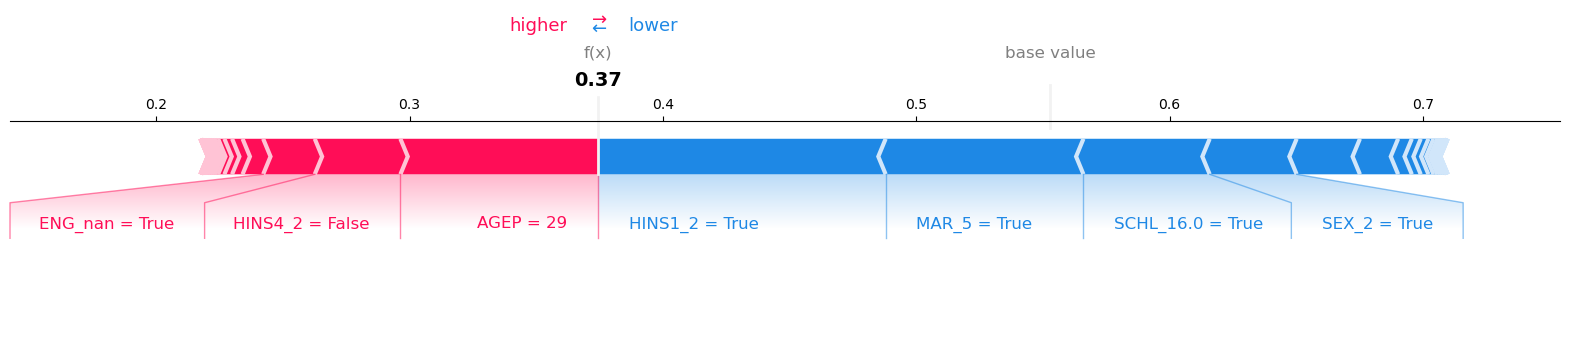

In [86]:
# Calculate shap values and force plot for the chosen singular row
shap_values = rf_explainer.shap_values(chosen_row)
shap.initjs()
shap.force_plot(rf_explainer.expected_value[1], shap_values[1], chosen_row, matplotlib=True)

Interpretation:

What we see above is a force plot visualizing shapley values for the features.
 - Feature values in pink (red?) increase the prediction, blue decreases.
 - Size of the bars show the magnitude of the effect.
 - Sum of all feature SHAP values explain why model prediction was different from baseline.
 - Model predicted 0.47 (False), where base value is ~0.55
 - We can see that the feature with most effect on the model was by far HINS1_2 being True.

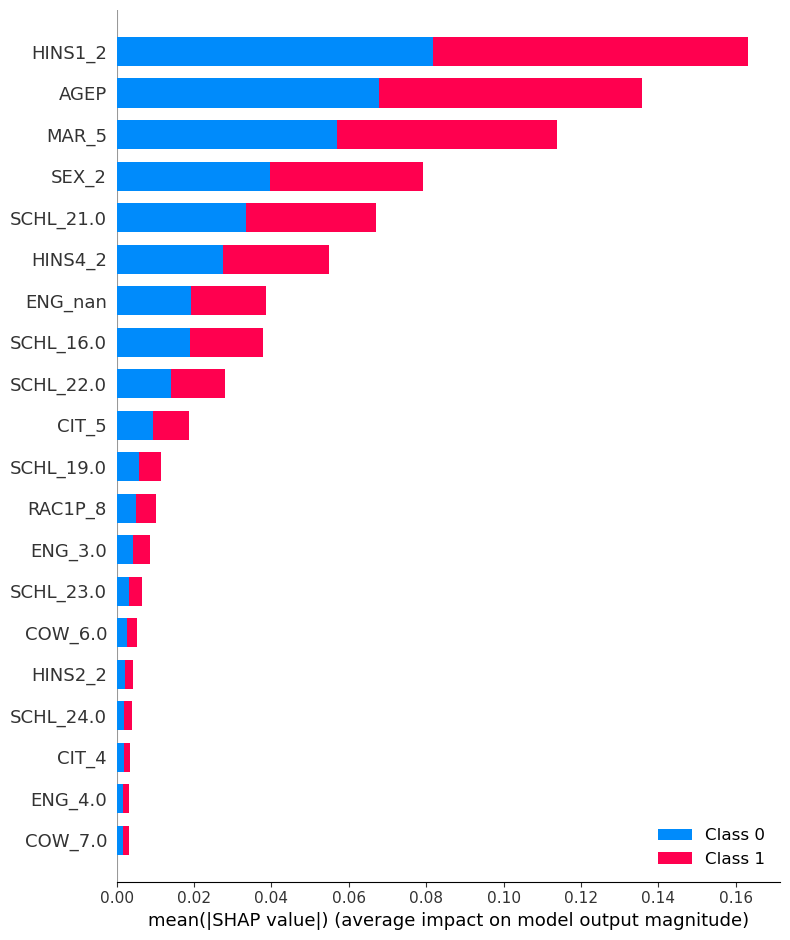

In [87]:
# We can also do a summary plot with more values
# As it takes a while to calculate, we will use only first 1000 rows
shap_values = rf_explainer.shap_values(X_test.iloc[:1000])
shap.summary_plot(shap_values, X_test.iloc[:1000])

## How do the models differ?

## How are the models similar?

## How does the Logistic Regression model-agnostic explanation compare to Task 2's?

## Task 3: Model agnostic explainations with SHAP

Here we use model agnostic explainations with SHAP to explain both of the models.

We first use a plot that takes all data rows to explain a bit generally the model overall.

Then we use take some specific rows of data in an attempt to explain more specific aspects of the models.

For features that are one-hot encoded we aggregate them.

In [ ]:
# imports
import shap

In [46]:
def gen_save_plots(X_train, X_test, columns, model, model_name, specific_rows):
    '''Inputs:
     - Train and Test Pandas DataFrames
     - Column list containing feature names in order of the columns in the DataFrames
     - Model to use for SHAP values
     - Model name (lr or rf for logistic regression or random forest respectively)
     - List of row indices to generate SHAP plots for
    Then generates and saves SHAP plots for the model to ../plots/
    '''

    print('Calculating SHAP values...')
    # explainer = shap.Explainer(model, X_train, feature_names=columns)
    # shap_values = explainer(X_test)

    print('Generating and saving general plot...')
    # shap.plots.bar(shap_values).savefig(f'../plots/{model_name}_general.png')

    print('Generating and saving row specific plots...')
    # for i in specific_rows:
    #     shap.force_plot(shap_values[i]).savefig(f'../plots/{model_name}_row_{i}.png')

    print('Done!')

In [47]:
gen_save_plots(0, 0, 0, 0, 0, 0)

Calculating SHAP values...
Generating and saving general plot...
Generating and saving row specific plots...
Done!


# Specific Rows chosen

In [3]:
# specific_rows = X_train.iloc[[0, 1, 2, ...]]
# print(specific_rows)

Write about the specific rows

## Logistic Regression - White Box

### General plot

In [1]:
# need to use scaled and encoded X_train and X_test data! The same stuff the model was trained on
# explainer = shap.Explainer(model, X_train, feature_names = np.array(data.columns))
# shap_values = explainer(X_test)
# shap.plots.bar(shap_values)
# save plot?

### Specific row plots

In [ ]:
# example 1
# shap.force_plot(shap_values[specific_rows[0]])

In [ ]:
# example 2
# shap.force_plot(shap_values[specific_rows[1]])

In [ ]:
# example 3
# shap.force_plot(shap_values[specific_rows[2]])

## Random Forest - Black Box

### General Plot

In [ ]:
# need to use scaled and encoded X_train and X_test data! The same stuff the model was trained on
# explainer = shap.Explainer(model, X_train, feature_names = np.array(data.columns))
# shap_values = explainer(X_test)
# shap.plots.bar(shap_values)
# save plot?

### Specific row plots

In [4]:
# example 1
# shap.force_plot(shap_values[specific_rows[0]])

In [5]:
# example 2
# shap.force_plot(shap_values[specific_rows[1]])

In [6]:
# example 3
# shap.force_plot(shap_values[specific_rows[2]])